Minimum magnitude: 11.103
minimum magnitude index: 8
julian date for index as of min magnitude: 2459995.86659
t2 magnitude: 13.103
t3 magnitude: 14.103
Closest magnitude to T2: 13.117 at index 45
Closest magnitude to T2: 14.137 at index 96
Julian date at index 45: 2459998.32691
Julian date at index 96: 2460000.31844
      T2 time: 2.4603199996054173
      T3 time: 4.451849999837577


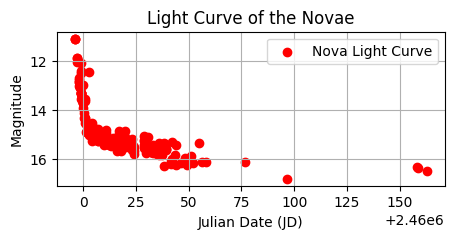

In [ ]:
# https://projectpluto.com/galnovae/galnovae.htm koji's list 

#V6596 Sgr

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load space-delimited AAVSO data
file_path = r"M:\Novea research\1\V6596 Sgr.txt"
df = pd.read_csv(file_path, sep=r'\s+') 

#print(df["HQuncertainty"].unique())
df_v = df[df["HQuncertainty"] == "V"]
#print(df_v)

# Extract Julian Date (JD) and Magnitude for 'V' filter (list)
jdd = df_v["JD"]
magg = df_v["Magnitude"]
mag = magg.astype(float)  # Convert to numeric values
jd = jdd.astype(float)  # Convert to numeric values
#print(f"jd: {jd}")
#print(f"magnitude: {mag}")

# Find maximum brightness (lowest magnitude)
mag_min = mag.min()  # Get the correct minimum value
print(f"Minimum magnitude: {mag_min}")
# Gets the index label where magnitude is lowest
min_index_mag = mag.idxmin()  
print(f"minimum magnitude index: {min_index_mag}")

# Get the corresponding Julian Date
jd_min_mag = jd.loc[min_index_mag]  # Use .loc[] with the index
print(f"julian date for index as of min magnitude: {jd_min_mag}")

# Compute t2 and t3 magnitude levels from maximum magnitude
t2_mag = mag_min + 2  
t3_mag = mag_min + 3  
print(f"t2 magnitude: {t2_mag}")
print(f"t3 magnitude: {t3_mag}")

closest_t2index = (mag - t2_mag).abs().idxmin()
closest_t2value = mag.loc[closest_t2index]
print(f"Closest magnitude to T2: {closest_t2value} at index {closest_t2index}")

closest_t3index = (mag - t3_mag).abs().idxmin()
closest_t3value = mag.loc[closest_t3index]
print(f"Closest magnitude to T2: {closest_t3value} at index {closest_t3index}")

jd_at_t2 = jd.loc[45]
print(f"Julian date at index 45: {jd_at_t2}")
jd_at_t3 = jd.loc[96]
print(f"Julian date at index 96: {jd_at_t3}")

T2 = jd_at_t2 - jd_min_mag
print(f"      T2 time: {T2}")
T3 = jd_at_t3 - jd_min_mag
print(f"      T3 time: {T3}")

# Plot the light curve
plt.figure(figsize=(5, 2))
plt.scatter(jd, mag, c='red', marker='o', label="Nova Light Curve")
plt.gca().invert_yaxis()  # Brighter objects have lower magnitudes
plt.xlabel("Julian Date (JD)")
plt.ylabel("Magnitude")
plt.title("Light Curve of the Novae")
plt.legend()
plt.grid()
plt.show()